In [1]:
import numpy as np
import pandas as pd
import time
from keras.models import Sequential
from keras.layers.core import Dense, Flatten
from keras.layers import Input
from keras.models import Model

import gym
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
def plot_state(obs):
    plt.figure(figsize=(12,8))
    plt.imshow(obs)
    plt.axis("off")
    plt.show()

In [3]:
env = gym.make("Breakout-v0")
init = env.reset()

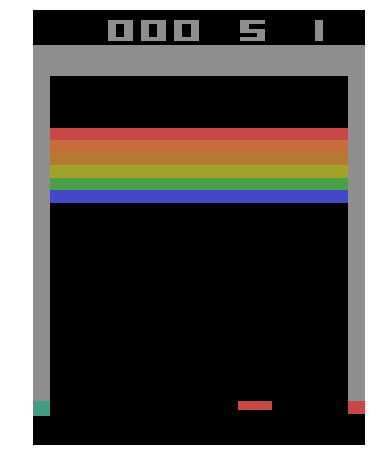

In [4]:
plot_state(init)

In [5]:
env.action_space

Discrete(4)

In [6]:
env.observation_space.shape

(210, 160, 3)

In [7]:
inp = Input(shape=env.observation_space.shape)
x = Flatten()(inp)
x = Dense(516, activation='relu')(x)
x = Dense(64, activation='relu')(x)
output = Dense(env.action_space.n)(x)

model = Model(inp, output)
model.compile(loss='mean_squared_error', optimizer='adam', metrics=["mse"])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 210, 160, 3)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 100800)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 516)               52013316  
_________________________________________________________________
dense_2 (Dense)              (None, 64)                33088     
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 260       
Total params: 52,046,664
Trainable params: 52,046,664
Non-trainable params: 0
_________________________________________________________________
None


In [8]:
observation = init

In [9]:
observation = np.expand_dims(observation,0)

In [10]:
observation.shape

(1, 210, 160, 3)

In [11]:
target = np.array([[1,1,1,1]])

In [12]:
target.shape

(1, 4)

In [13]:
model.evaluate(observation, np.array([[30,30,30,30]]))

1/1 [==============================] - 0s 464ms/step


[8459.2529296875, 8459.2529296875]

In [14]:
model.predict(observation)

array([[-153.2912  ,   19.56092 ,   18.522263,   30.79692 ]],
      dtype=float32)

In [15]:
env = gym.make("Breakout-v0")
observation = env.reset()
observation = np.expand_dims(observation,0)

episodes = 2
epsilon = 0.5
gamma = 0.9
done = False

history = {}


for i in range(1, 1000):
    print("Welcome to AI Breakout!")
    print("Starting Game {}...\n".format(i))
    
    history[i] = {"input":[], "reward":[], "Q":[]}
    sum = 0
    game = True
    while game:
        
        history[i]["input"].append(observation)
        history[i]["reward"].append(0)
        
        if np.random.uniform(0,1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(model.predict(observation))
            
        observation, reward, done, info = env.step(action)
        observation = np.expand_dims(observation,0)
        
        history[i]["input"].append(observation)
        history[i]["reward"].append(reward)
        
        sum += reward

        #time.sleep(0.05)
        #env.render()
        
        #plot_state(observation)
        if done:
            
            Q = []
            for j,k in enumerate(history[i]["reward"][::-1]):
                if j == 0:
                    Q.append(np.array([k]))
                else:
                    Q.append(np.array([k + gamma*Q[j-1]]))
            
            Q = np.array(Q[::-1])
            Q = np.repeat(Q,4, axis=1)

            history[i]["Q"] = Q 
            
            print("Training the model...")
            
            history[i]["input"] = np.array(history[i]["input"])
            print(history[i]["input"].shape)
            history[i]["input"] = history[i]["input"].reshape((history[i]["input"].shape[0],\
                                                               history[i]["input"].shape[2],\
                                                               history[i]["input"].shape[3],\
                                                               history[i]["input"].shape[4]))
            print(history[i]["input"].shape)
            model.fit(history[i]["input"], history[i]["Q"], epochs = 1, batch_size=50)
            
            
            observation = env.reset()
            observation = np.expand_dims(observation,0)
            
            print("Total game score was: {}\n".format(sum))
            epsilon -= 0.001
            game = False
                             
        else:
            pass
            
            

Welcome to AI Breakout!
Starting Game 1...

Training the model...
(694, 1, 210, 160, 3)
(694, 210, 160, 3)
Epoch 1/1
694/694 [==============================] - 17s 25ms/step - loss: 8098028.0997 - mean_squared_error: 8098028.0997
Total game score was: 3.0

Welcome to AI Breakout!
Starting Game 2...

Training the model...
(502, 1, 210, 160, 3)
(502, 210, 160, 3)
Epoch 1/1
502/502 [==============================] - 13s 25ms/step - loss: 324225.6331 - mean_squared_error: 324225.6331
Total game score was: 1.0

Welcome to AI Breakout!
Starting Game 3...

Training the model...
(492, 1, 210, 160, 3)
(492, 210, 160, 3)
Epoch 1/1
492/492 [==============================] - 12s 24ms/step - loss: 96195.6398 - mean_squared_error: 96195.6398
Total game score was: 1.0

Welcome to AI Breakout!
Starting Game 4...

Training the model...
(466, 1, 210, 160, 3)
(466, 210, 160, 3)
Epoch 1/1
466/466 [==============================] - 12s 25ms/step - loss: 58683.8871 - mean_squared_error: 58683.8871
Total gam

404/404 [==============================] - 10s 26ms/step - loss: 360471.2592 - mean_squared_error: 360471.2592
Total game score was: 0.0

Welcome to AI Breakout!
Starting Game 34...

Training the model...
(444, 1, 210, 160, 3)
(444, 210, 160, 3)
Epoch 1/1
444/444 [==============================] - 11s 24ms/step - loss: 123458.6381 - mean_squared_error: 123458.6381
Total game score was: 1.0

Welcome to AI Breakout!
Starting Game 35...

Training the model...
(754, 1, 210, 160, 3)
(754, 210, 160, 3)
Epoch 1/1
754/754 [==============================] - 19s 25ms/step - loss: 73714.9108 - mean_squared_error: 73714.9108
Total game score was: 3.0

Welcome to AI Breakout!
Starting Game 36...

Training the model...
(614, 1, 210, 160, 3)
(614, 210, 160, 3)
Epoch 1/1
614/614 [==============================] - 15s 25ms/step - loss: 20632.9088 - mean_squared_error: 20632.9088
Total game score was: 2.0

Welcome to AI Breakout!
Starting Game 37...

Training the model...
(432, 1, 210, 160, 3)
(432, 210

Training the model...
(488, 1, 210, 160, 3)
(488, 210, 160, 3)
Epoch 1/1
488/488 [==============================] - 12s 24ms/step - loss: 327.3365 - mean_squared_error: 327.3365
Total game score was: 1.0

Welcome to AI Breakout!
Starting Game 67...

Training the model...
(506, 1, 210, 160, 3)
(506, 210, 160, 3)
Epoch 1/1
506/506 [==============================] - 13s 25ms/step - loss: 369.3453 - mean_squared_error: 369.3453
Total game score was: 1.0

Welcome to AI Breakout!
Starting Game 68...

Training the model...
(374, 1, 210, 160, 3)
(374, 210, 160, 3)
Epoch 1/1
374/374 [==============================] - 9s 25ms/step - loss: 707.8984 - mean_squared_error: 707.8984
Total game score was: 0.0

Welcome to AI Breakout!
Starting Game 69...

Training the model...
(716, 1, 210, 160, 3)
(716, 210, 160, 3)
Epoch 1/1
716/716 [==============================] - 18s 25ms/step - loss: 408.6566 - mean_squared_error: 408.6566
Total game score was: 3.0

Welcome to AI Breakout!
Starting Game 70...

T

802/802 [==============================] - 20s 26ms/step - loss: 22015.7491 - mean_squared_error: 22015.7491
Total game score was: 4.0

Welcome to AI Breakout!
Starting Game 99...

Training the model...
(682, 1, 210, 160, 3)
(682, 210, 160, 3)
Epoch 1/1
682/682 [==============================] - 17s 25ms/step - loss: 854307.5585 - mean_squared_error: 854307.5585
Total game score was: 2.0

Welcome to AI Breakout!
Starting Game 100...

Training the model...
(598, 1, 210, 160, 3)
(598, 210, 160, 3)
Epoch 1/1
598/598 [==============================] - 14s 24ms/step - loss: 163092.8708 - mean_squared_error: 163092.8708
Total game score was: 2.0

Welcome to AI Breakout!
Starting Game 101...

Training the model...
(482, 1, 210, 160, 3)
(482, 210, 160, 3)
Epoch 1/1
482/482 [==============================] - 12s 25ms/step - loss: 83585.2306 - mean_squared_error: 83585.2306
Total game score was: 1.0

Welcome to AI Breakout!
Starting Game 102...

Training the model...
(816, 1, 210, 160, 3)
(816, 

Training the model...
(440, 1, 210, 160, 3)
(440, 210, 160, 3)
Epoch 1/1
440/440 [==============================] - 11s 24ms/step - loss: 206.5739 - mean_squared_error: 206.5739
Total game score was: 1.0

Welcome to AI Breakout!
Starting Game 132...

Training the model...
(742, 1, 210, 160, 3)
(742, 210, 160, 3)
Epoch 1/1
742/742 [==============================] - 18s 24ms/step - loss: 165.1305 - mean_squared_error: 165.1305
Total game score was: 4.0

Welcome to AI Breakout!
Starting Game 133...

Training the model...
(478, 1, 210, 160, 3)
(478, 210, 160, 3)
Epoch 1/1
478/478 [==============================] - 12s 24ms/step - loss: 144.9238 - mean_squared_error: 144.9238
Total game score was: 1.0

Welcome to AI Breakout!
Starting Game 134...

Training the model...
(700, 1, 210, 160, 3)
(700, 210, 160, 3)
Epoch 1/1
700/700 [==============================] - 17s 24ms/step - loss: 122.5798 - mean_squared_error: 122.5798
Total game score was: 1.0

Welcome to AI Breakout!
Starting Game 135.

Training the model...
(616, 1, 210, 160, 3)
(616, 210, 160, 3)
Epoch 1/1
616/616 [==============================] - 16s 25ms/step - loss: 45.4118 - mean_squared_error: 45.4118
Total game score was: 2.0

Welcome to AI Breakout!
Starting Game 165...

Training the model...
(680, 1, 210, 160, 3)
(680, 210, 160, 3)
Epoch 1/1
680/680 [==============================] - 17s 25ms/step - loss: 45.6262 - mean_squared_error: 45.6262
Total game score was: 1.0

Welcome to AI Breakout!
Starting Game 166...

Training the model...
(554, 1, 210, 160, 3)
(554, 210, 160, 3)
Epoch 1/1
554/554 [==============================] - 14s 26ms/step - loss: 66.5357 - mean_squared_error: 66.5357
Total game score was: 2.0

Welcome to AI Breakout!
Starting Game 167...

Training the model...
(664, 1, 210, 160, 3)
(664, 210, 160, 3)
Epoch 1/1
664/664 [==============================] - 17s 25ms/step - loss: 152.8397 - mean_squared_error: 152.8397
Total game score was: 3.0

Welcome to AI Breakout!
Starting Game 168...

Tr

Training the model...
(332, 1, 210, 160, 3)
(332, 210, 160, 3)
Epoch 1/1
332/332 [==============================] - 8s 26ms/step - loss: 14.8281 - mean_squared_error: 14.8281
Total game score was: 0.0

Welcome to AI Breakout!
Starting Game 198...

Training the model...
(1370, 1, 210, 160, 3)
(1370, 210, 160, 3)
Epoch 1/1
1370/1370 [==============================] - 34s 25ms/step - loss: 27837.5058 - mean_squared_error: 27837.5058
Total game score was: 8.0

Welcome to AI Breakout!
Starting Game 199...

Training the model...
(776, 1, 210, 160, 3)
(776, 210, 160, 3)
Epoch 1/1
776/776 [==============================] - 19s 25ms/step - loss: 2848.1770 - mean_squared_error: 2848.1770
Total game score was: 7.0

Welcome to AI Breakout!
Starting Game 200...

Training the model...
(358, 1, 210, 160, 3)
(358, 210, 160, 3)
Epoch 1/1
358/358 [==============================] - 10s 27ms/step - loss: 911.0412 - mean_squared_error: 911.0412
Total game score was: 0.0

Welcome to AI Breakout!
Starting Ga

Training the model...
(494, 1, 210, 160, 3)
(494, 210, 160, 3)
Epoch 1/1
494/494 [==============================] - 12s 24ms/step - loss: 24.7609 - mean_squared_error: 24.7609
Total game score was: 0.0

Welcome to AI Breakout!
Starting Game 231...

Training the model...
(524, 1, 210, 160, 3)
(524, 210, 160, 3)
Epoch 1/1
524/524 [==============================] - 13s 25ms/step - loss: 65.2735 - mean_squared_error: 65.2735
Total game score was: 2.0

Welcome to AI Breakout!
Starting Game 232...

Training the model...
(436, 1, 210, 160, 3)
(436, 210, 160, 3)
Epoch 1/1
436/436 [==============================] - 11s 25ms/step - loss: 22.5508 - mean_squared_error: 22.5508
Total game score was: 0.0

Welcome to AI Breakout!
Starting Game 233...

Training the model...
(388, 1, 210, 160, 3)
(388, 210, 160, 3)
Epoch 1/1
388/388 [==============================] - 9s 24ms/step - loss: 16.9900 - mean_squared_error: 16.9900
Total game score was: 0.0

Welcome to AI Breakout!
Starting Game 234...

Train

KeyboardInterrupt: 

In [16]:
model.predict(observation)

array([[-1.8696729,  1.4428067, -1.051539 ,  1.7388945]], dtype=float32)